In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()
from scipy.stats import pearsonr

In [5]:
df = pd.read_excel('Data/Table.xlsx')
df['M2019'] = df['M2019'].apply(lambda x: list(map(int, x.split(';'))))
# Calculate mean and standard deviation using apply and numpy functions
df['M2019_mean'] = df['M2019'].apply(np.mean)
df['M2019_std'] = df['M2019'].apply(np.std, ddof=0)  # Use ddof=0 for population std deviation

df['D2012'] = df['D2012'].apply(lambda x: list(map(int, x.split(';'))))
df['D2012_mean'] = df['D2012'].apply(np.mean)
df['D2012_std'] = df['D2012'].apply(np.std, ddof=0)  # Use ddof=0 for population std deviation

df['V2010'] = df['V2010'].apply(lambda x: list(map(int, x.split(';'))))
df['V2010_mean'] = df['V2010'].apply(np.mean)
df['V2010_std'] = df['V2010'].apply(np.std, ddof=0)  # Use ddof=0 for population std deviation

df['M2015'] = df['M2015'].apply(lambda x: list(map(int, x.split(';'))) if isinstance(x, str) else x)
df['M2015_mean'] = df['M2015'].apply(np.mean)
df['M2015_std'] = df['M2015'].apply(np.std, ddof=0)  # Use ddof=0 for population std deviation

df = df[['name', 'flat_slab_size_min', 'flat_slab_size_max', 'age_min','age_max','M2019_mean',	'M2019_std',	'D2012_mean',	'D2012_std',	'V2010_mean',	'V2010_std',	'M2015_mean',	'M2015_std']]

df

,name,flat_slab_size_min,flat_slab_size_max,age_min,age_max,M2019_mean,M2019_std,D2012_mean,D2012_std,V2010_mean,V2010_std,M2015_mean,M2015_std
0,(1) Chilean/Pampean,330,330,0,12,59.000000,9.416298,126.000000,22.226111,66.333333,17.249799,32.000000,22.642144
1,(2) Peruvian,375,375,0,12,-25.333333,73.145213,210.333333,14.839886,68.000000,20.215506,71.333333,9.463380
2,(3) Bucaramanga,350,350,0,9,12.666667,87.010855,129.333333,28.778850,114.000000,53.347915,59.000000,41.785165
3,(4) Mexican,160,160,0,20,202.333333,51.486784,255.000000,10.198039,145.666667,33.068952,145.000000,13.490738
4,(5) SW Japan,280,280,0,15,225.000000,22.730303,33.333333,0.942809,271.333333,15.173076,206.000000,20.848661
5,(6) Alaska,460,460,0,30,149.666667,4.496913,174.333333,3.091206,35.000000,9.933110,142.333333,1.247219
6,(7) Laramide,1400,1400,50,95,1699.666667,56.758749,1943.333333,102.740233,808.000000,45.985505,NaN,NaN
7,(8) Puna,450,750,18,30,60.666667,26.411277,192.000000,51.749396,87.666667,51.447924,147.333333,49.815214
8,(9) Altiplano,450,700,25,50,99.666667,1.247219,249.666667,24.499433,-85.000000,40.207794,152.333333,18.909139
9,(10) Izanagi flat slab,1300,1500,65,100,437.000000,134.553583,-954.666667,289.528736,95.333333,170.364968,NaN,NaN


In [6]:
melted =pd.melt(
    df,
    id_vars=["name", "flat_slab_size_min", "flat_slab_size_max", 'age_min','age_max'],
    value_vars=[col for col in df.columns if col not in ["name", "flat_slab_size_min", "flat_slab_size_max", 'age_min','age_max']],
    var_name="trench_motion_metric",
    value_name="value",
)

# Extract the reference frame and metric type
melted["reference_frame"] = melted["trench_motion_metric"].str.extract(r"([A-Z]\d{4})")
melted["metric_type"] = melted["trench_motion_metric"].str.extract(r"_(mean|std)")

# Pivot the metric type to separate mean and std
reshaped = melted.pivot_table(
    index=["name", "flat_slab_size_min", "flat_slab_size_max", "reference_frame", 'age_min','age_max'
          ],
    columns="metric_type",
    values="value"
).reset_index()


# # Define the custom order
custom_order = ['(1) Chilean/Pampean', '(2) Peruvian', 
                '(3) Bucaramanga', '(4) Mexican', '(5) SW Japan', '(6) Alaska', '(7) Laramide',
                '(8) Puna ', '(9) Altiplano','(10) Izanagi flat slab ','(11) Patagonian Nalé ', '(12) South Gondwana', '(13) East Asia Yanshanian']

# Convert 'name' column to a categorical type with the specified order
reshaped['name'] = pd.Categorical(reshaped['name'], categories=custom_order, ordered=True)

# Sort the DataFrame
reshaped = reshaped.sort_values('name')
reshaped = reshaped.reset_index()

# Rename columns for clarity
reshaped = reshaped.rename(columns={"mean": "trench_motion_mean", "std": "trench_motion_std"})
reshaped.head()

metric_type,index,name,flat_slab_size_min,flat_slab_size_max,reference_frame,age_min,age_max,trench_motion_mean,trench_motion_std
0,0,(1) Chilean/Pampean,330,330,D2012,0,12,126.000000,22.226111
1,1,(1) Chilean/Pampean,330,330,M2015,0,12,32.000000,22.642144
2,2,(1) Chilean/Pampean,330,330,M2019,0,12,59.000000,9.416298
3,3,(1) Chilean/Pampean,330,330,V2010,0,12,66.333333,17.249799
4,19,(2) Peruvian,375,375,V2010,0,12,68.000000,20.215506


## Calculate p-values and $R^2$

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, linregress
from sklearn.linear_model import LinearRegression

def bootstrap_linear_regression_with_error(df, x_col, y_col, std_col, n_bootstraps=1000, ci=95):
    """
    Performs bootstrapped linear regression, considering standard deviation for sampling.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame containing the data.
        x_col (str): Name of the column for the predictor variable (X).
        y_col (str): Name of the column for the response variable (Y).
        std_col (str): Name of the column for the standard deviation of Y values.
        n_bootstraps (int): Number of bootstrap iterations. Default is 1000.
        ci (float): Confidence interval percentage (0-100). Default is 95.
    
    Returns:
        dict: A dictionary with regression results, confidence intervals, and mean regression line data.
    """
    # Filter and prepare data
    data = df[[x_col, y_col, std_col]].dropna()
    x = data[x_col].to_numpy()
    y = data[y_col].to_numpy()
    y_std = data[std_col].to_numpy()
    size = y.shape[0]
    
    # Pearson correlation
    corr, p_value_p = pearsonr(x, y)
    
    # Bootstrapping
    coefficients = []
    intercepts = []
    for _ in range(n_bootstraps):
        idx = np.random.randint(0, size, size)
        x_train = x[idx]
        y_train = np.random.normal(loc=y[idx], scale=y_std[idx])  # Sample using the standard deviation
        model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        coefficients.append(model.coef_.item())
        intercepts.append(model.intercept_)
    
    # Confidence intervals
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    lower_coefficient = np.percentile(coefficients, lower_percentile)
    upper_coefficient = np.percentile(coefficients, upper_percentile)
    lower_intercept = np.percentile(intercepts, lower_percentile)
    upper_intercept = np.percentile(intercepts, upper_percentile)
    
    # Mean regression line
    mean_coefficient = np.mean(coefficients)
    mean_intercept = np.mean(intercepts)
    x_range = np.linspace(min(x), max(x), 100)
    y_pred = mean_coefficient * x_range + mean_intercept
    
    # Calculate R-squared and p-value using the original data
    r_value, p_value = pearsonr(x,y)
    model_mean = LinearRegression().fit(x.reshape(-1, 1), y)
    r_squared = model_mean.score(x.reshape(-1, 1), y)
    
    return {
        "correlation": corr,
        "p_value_pearson": p_value_p,
        "mean_coefficient": mean_coefficient,
        "mean_intercept": mean_intercept,
        "coefficient_confidence_interval": (lower_coefficient, upper_coefficient),
        "intercept_confidence_interval": (lower_intercept, upper_intercept),
        "r_squared": r_squared,
        "p_value": p_value,
        "x_range": x_range,
        "y_pred": y_pred
    }


# Select min or max flat slab extent

## Minimun Extent

In [8]:
flat_slab_size = 'min'

if flat_slab_size == 'max':
    reshaped['slab_bend_motion'] = reshaped['trench_motion_mean'] - reshaped['flat_slab_size_max']
    reshaped['flat_slab_size'] = reshaped['flat_slab_size_max']
    df['flat_slab_size'] = df['flat_slab_size_max']
else:
    reshaped['slab_bend_motion'] = reshaped['trench_motion_mean'] - reshaped['flat_slab_size_min']
    reshaped['flat_slab_size'] = reshaped['flat_slab_size_min']
    df['flat_slab_size'] = df['flat_slab_size_min']
df['State'] = np.where(df['age_min']==0, 'Active', 'Ancient')

reshaped['State'] = np.where(reshaped['age_min']==0, 'Active', 'Ancient')
reshaped['slab_bend_motion'] = reshaped['trench_motion_mean'] - reshaped['flat_slab_size']
    
reshaped['contribution_trench'] =  (reshaped['trench_motion_mean'] / reshaped['flat_slab_size']) * 100
reshaped['contribution_trench'] = np.where(reshaped['contribution_trench']>100, 100, reshaped['contribution_trench'])
reshaped['contribution_trench'] = np.where(reshaped['contribution_trench']<0, 0, reshaped['contribution_trench'])

reshaped['contribution_hinge'] =  (-reshaped['slab_bend_motion'] / reshaped['flat_slab_size']) * 100
reshaped['contribution_hinge'] = np.where(reshaped['contribution_hinge']>100, 100, reshaped['contribution_hinge'])
reshaped['contribution_hinge'] = np.where(reshaped['contribution_hinge']<0, 0, reshaped['contribution_hinge'])

## Figure 5A

([<matplotlib.axis.XTick at 0x7fc6503fd720>,
 [Text(-3000, 0, '−3000'),
  Text(-2250, 0, '−2250'),
  Text(-1500, 0, '−1500'),
  Text(-750, 0, '−750'),
  Text(0, 0, '0'),
  Text(750, 0, '750')])

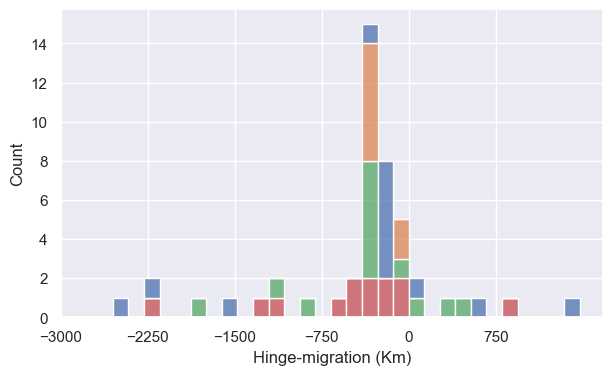

In [9]:
plt.figure(figsize=(7, 4))
sns.histplot(reshaped, x = 'slab_bend_motion', hue = 'reference_frame', bins = 30,multiple = 'stack', legend = False)
# Reverse the x-axis
# plt.ylim(-3000, 1000)

# plt.xlim(-3000, 800)
# plt.gca().set_xlim(plt.gca().get_xlim()[::-1])
# plt.title('Hinge-migration (Km)')
plt.xlabel('Hinge-migration (Km)')

# ax.set_xlim(0, 1650)
plt.xticks(np.arange(-3000, 1000, 750))
# plt.savefig('figures/5A.pdf', dpi =600, bbox_inches='tight')

## Absolute Trench Migration


Figure 4A

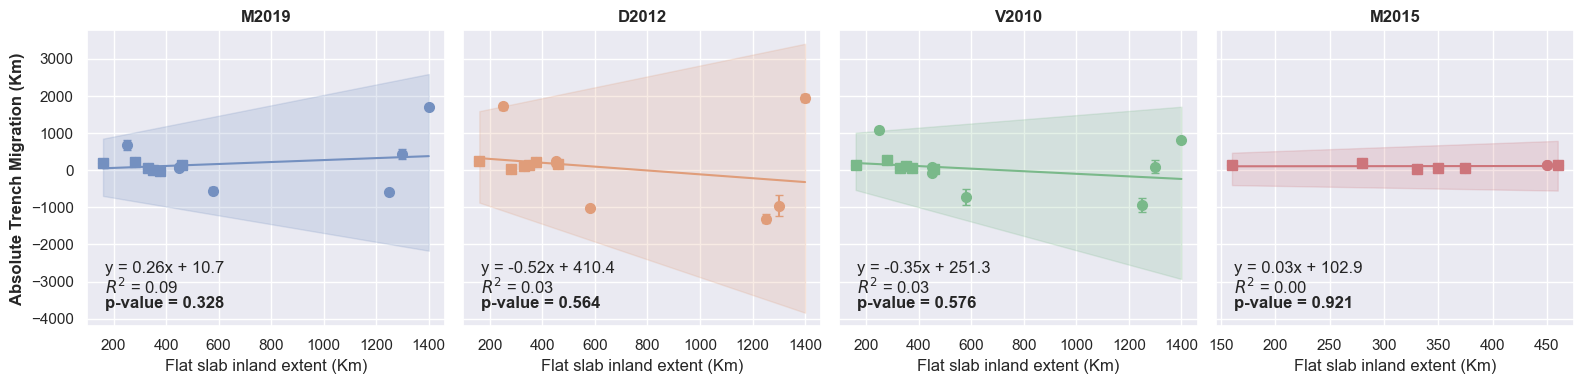

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=False, sharey=True)

# Set common axis labels
for ax in axes:
    ax.set_xlabel('Flat slab inland extent (Km)', fontsize=12)
axes[0].set_ylabel('Absolute Trench Migration (Km)', fontweight='bold', fontsize=12)

# Set titles for each subplot
titles = ['M2019','D2012','V2010', 'M2015']
colors = ["#7490C0", "#E09D7A", "#7AB98A", "#CD757B"]
models = ['M2019','D2012','V2010', 'M2015']

for ax, title, model, color in zip(axes, titles, models, colors):
    
    df_ = reshaped[reshaped['reference_frame'] == model].copy()
    
    results = bootstrap_linear_regression_with_error(df_, 'flat_slab_size', 'trench_motion_mean', 'trench_motion_std', n_bootstraps=1000, ci=95)
    
    ax.set_title(title, fontweight='bold', fontsize=12)

    # Error bars for all data points
    ax.errorbar(df_['flat_slab_size'], df_['trench_motion_mean'], 
                yerr=df_['trench_motion_std'], fmt='o', color=color, 
                ecolor=color, elinewidth=1.5, capsize=3, 
                label='All data', markersize=7, zorder=2)

    # Error bars for active state data points
    ax.errorbar(df_[df_['State'] == 'Active']['flat_slab_size'], 
                df_[df_['State'] == 'Active']['trench_motion_mean'], 
                yerr=df_[df_['State'] == 'Active']['trench_motion_std'], 
                fmt='s', color=color, ecolor=color, elinewidth=1.5, 
                capsize=3, label='Active state', markersize=7, zorder=3)

    # Plot regression line
    ax.plot(results['x_range'], results['y_pred'], 
            zorder=1, linestyle='-', color=color)
    
    
    ax.fill_between(results['x_range'], results['coefficient_confidence_interval'][0] * results['x_range'] + results['intercept_confidence_interval'][0],
                results['coefficient_confidence_interval'][1] * results['x_range'] + results['intercept_confidence_interval'][1], color=color, alpha=0.2, label='95% CI for Coefficient')
    
    # Add equation and R^2 text
    equation_text = f"y = {results['mean_coefficient']:.2f}x + {results['mean_intercept']:.1f}"
    # equation_text = f"y = {results['mean_coefficient']:.1f}x {results['mean_intercept']:+.1f}"
    r2_text = f"$R^2$ = {results['r_squared']:.2f}"
    p_text = f"p-value = {results['p_value']:.3f}"
    ax.text(0.05, 0.05, p_text, fontsize=12, transform=ax.transAxes, ha='left', va='bottom',fontweight='bold')
    ax.text(0.05, 0.1, r2_text, fontsize=12, transform=ax.transAxes, ha='left', va='bottom')
    ax.text(0.05, 0.17, equation_text, fontsize=12, transform=ax.transAxes, ha='left', va='bottom')


plt.tight_layout()

# plt.savefig('figures/4A.pdf', dpi =600, bbox_inches='tight') 
# plt.savefig('figures/4A.svg', dpi =600, bbox_inches='tight') 

plt.show()

## Slab Bend Motion

Figure 4B

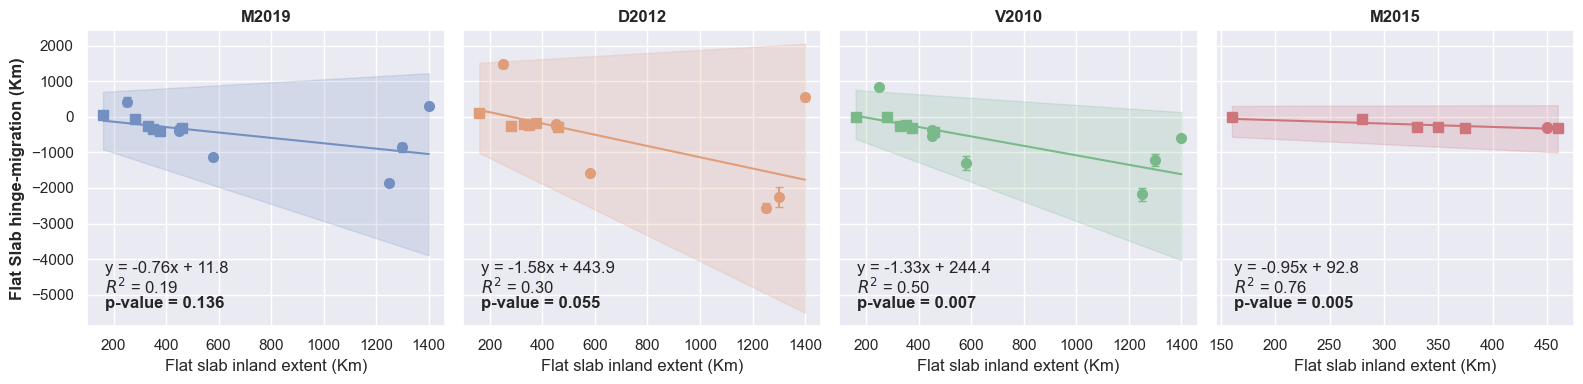

In [11]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharex=False, sharey=True)

# Set common axis labels
for ax in axes:
    ax.set_xlabel('Flat slab inland extent (Km)', fontsize=12)
axes[0].set_ylabel('Flat Slab hinge-migration (Km)', fontweight='bold', fontsize=12)

# Set titles for each subplot
titles = ['M2019','D2012','V2010', 'M2015']
colors = ["#7490C0", "#E09D7A", "#7AB98A", "#CD757B"]
models = ['M2019','D2012','V2010', 'M2015']

for ax, title, model, color in zip(axes, titles, models, colors):
    
    df_ = reshaped[reshaped['reference_frame'] == model].copy()
    
    results = bootstrap_linear_regression_with_error(df_, 'flat_slab_size', 'slab_bend_motion', 'trench_motion_std', n_bootstraps=1000, ci=95)
    
    ax.set_title(title, fontweight='bold', fontsize=12)

    # Error bars for all data points
    ax.errorbar(df_['flat_slab_size'], df_['slab_bend_motion'], 
                yerr=df_['trench_motion_std'], fmt='o', color=color, 
                ecolor=color, elinewidth=1.5, capsize=3, 
                label='All data', markersize=7, zorder=2)

    # Error bars for active state data points
    ax.errorbar(df_[df_['State'] == 'Active']['flat_slab_size'], 
                df_[df_['State'] == 'Active']['slab_bend_motion'], 
                yerr=df_[df_['State'] == 'Active']['trench_motion_std'], 
                fmt='s', color=color, ecolor=color, elinewidth=1.5, 
                capsize=3, label='Active state', markersize=7, zorder=3)

    # Plot regression line
    ax.plot(results['x_range'], results['y_pred'], 
            zorder=1, linestyle='-', color=color)
    
    
    ax.fill_between(results['x_range'], results['coefficient_confidence_interval'][0] * results['x_range'] + results['intercept_confidence_interval'][0],
                results['coefficient_confidence_interval'][1] * results['x_range'] + results['intercept_confidence_interval'][1], color=color, alpha=0.2, label='95% CI for Coefficient')
    
    # Add equation and R^2 text
    equation_text = f"y = {results['mean_coefficient']:.2f}x + {results['mean_intercept']:.1f}"
    r2_text = f"$R^2$ = {results['r_squared']:.2f}"
    p_text = f"p-value = {results['p_value']:.3f}"
    ax.text(0.05, 0.05, p_text, fontsize=12, transform=ax.transAxes, ha='left', va='bottom',fontweight='bold')
    ax.text(0.05, 0.1, r2_text, fontsize=12, transform=ax.transAxes, ha='left', va='bottom')
    ax.text(0.05, 0.17, equation_text, fontsize=12, transform=ax.transAxes, ha='left', va='bottom')


plt.tight_layout()

# plt.savefig('figures/4B.pdf', dpi =600, bbox_inches='tight') 
# plt.savefig('figures/4B.svg', dpi =600, bbox_inches='tight') 

plt.show()

# Apply K-means on the contributions

In [12]:
df_contribution_hinge = reshaped[['name','reference_frame','contribution_hinge']].pivot_table(index='name', columns='reference_frame', values='contribution_hinge').reset_index()
df_contribution_hinge

reference_frame,name,D2012,M2015,M2019,V2010
0,(1) Chilean/Pampean,61.818182,90.303030,82.121212,79.898990
1,(2) Peruvian,43.911111,80.977778,100.000000,81.866667
2,(3) Bucaramanga,63.047619,83.142857,96.380952,67.428571
3,(4) Mexican,0.000000,9.375000,0.000000,8.958333
4,(5) SW Japan,88.095238,26.428571,19.642857,3.095238
5,(6) Alaska,62.101449,69.057971,67.463768,92.391304
6,(7) Laramide,0.000000,NaN,0.000000,42.285714
7,(8) Puna,57.333333,67.259259,86.518519,80.518519
8,(9) Altiplano,44.518519,66.148148,77.851852,100.000000
9,(10) Izanagi flat slab,100.000000,NaN,66.384615,92.666667


In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df_kmeans = df_contribution_hinge[['name', 'D2012', 'M2019', 'V2010']]

# Handle missing values (fill with the mean of the column in this example)
df_kmeans.fillna(df_kmeans.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_kmeans.drop(columns=['name']))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(scaled_data)

# Display the dataframe with clusters
df_kmeans

NameError: name 'df_contribution_hinge' is not defined

In [12]:
df_kmeans['M2015'] = df_contribution_hinge['M2015']

df1 = df_kmeans
df2 = df

# Set the index to the 'name' column
df1.set_index('name', inplace=True)
df2.set_index('name', inplace=True)

# Reindex df1 based on df2's index
df1_ordered = df1.reindex(df2.index)

# Optionally reset the index if you need 'name' back as a column
df1_ordered.reset_index(inplace=True)

melted_kmeans = pd.melt(df1_ordered, id_vars=['name','cluster'], var_name="reference_frame", value_name="hinge_contribution")
melted_kmeans['mode'] = np.where(melted_kmeans['cluster']==1,'Forward-mode','Backward-mode')

## Figure 5B

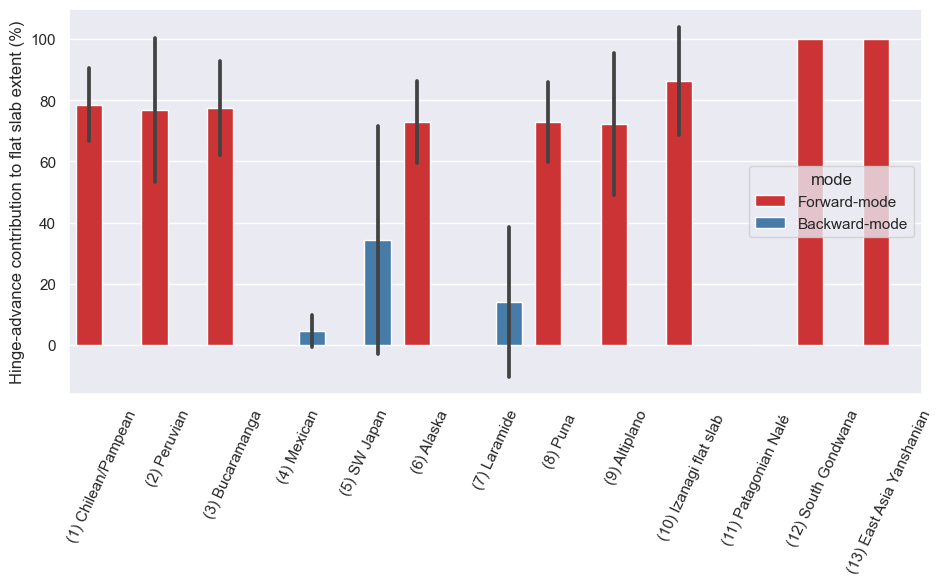

In [36]:
plt.figure(figsize=(11, 5))
sns.barplot(melted_kmeans, x="name", y="hinge_contribution", hue='mode', errorbar="sd",palette="Set1")
plt.xticks(rotation=65)
plt.ylabel('Hinge-advance contribution to flat slab extent (%)')
plt.xlabel('')

plt.savefig('figures/5B.pdf', dpi =600, bbox_inches='tight')
plt.savefig('figures/5B.svg', dpi =600, bbox_inches='tight') 

In [14]:
melted_kmeans[melted_kmeans['cluster']==1]['hinge_contribution'].mean()
# melted_kmeans[melted_kmeans['cluster']==1]['hinge_contribution'].std()

# melted_kmeans[melted_kmeans['cluster']==0]['hinge_contribution'].mean()
# melted_kmeans[melted_kmeans['cluster']==0]['hinge_contribution'].std()

80.63972401969768

In [15]:
melted_kmeans[melted_kmeans['cluster']==1]['hinge_contribution'].std()

17.074396023411012

In [16]:
melted_kmeans[melted_kmeans['cluster']==0]['hinge_contribution'].mean()

14.1343537414966

In [17]:
melted_kmeans[melted_kmeans['cluster']==0]['hinge_contribution'].std()

24.82859287273483

## Export Final Table

In [22]:
reshaped[[ 'name', 'flat_slab_size_min', 'flat_slab_size_max',
       'reference_frame', 'age_min', 'age_max', 'trench_motion_mean',
       'trench_motion_std', 'slab_bend_motion', 'flat_slab_size', 'State',
       'contribution_trench', 'contribution_hinge']].to_csv('Table_final_4.csv',index = False)